In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

sns.set_style("white")
pollution = pd.read_csv('pollution_us_2000_2016.csv')

In [2]:
pollution.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [3]:
pollution_4th = pollution[pollution.index % 4 == 0]  # Selects every 3rd raw starting from 0
pollution_4th.head(5)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,...,Parts per billion,5.250000,11.0,19,16.0,Parts per million,1.929167,4.4,8,NaN
12,12,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,...,Parts per billion,7.083333,16.0,8,23.0,Parts per million,1.991667,5.1,21,NaN
16,16,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,...,Parts per billion,8.708333,15.0,7,21.0,Parts per million,2.620833,5.6,7,NaN


In [4]:
pollution_4th.describe()

,Unnamed: 0,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,230131.000000,436666.000000,436666.000000,436666.000000,222812.000000
mean,54714.292794,22.309193,71.693132,1118.174781,12.822330,25.415378,11.730680,23.898675,0.026125,0.039204,10.170494,36.051243,1.870738,4.483495,9.615461,6.616927,0.367895,0.613697,7.910181,6.166329
std,33729.011536,17.256362,79.477961,2003.065057,9.505208,16.000430,7.877396,15.163294,0.011370,0.015345,4.003116,19.783043,2.759576,7.653349,6.748835,11.445803,0.314110,0.633467,7.999020,5.904567
min,0.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000,0.000000,-0.404167,-0.300000,0.000000,0.000000
25%,25754.000000,6.000000,17.000000,9.000000,5.750000,13.000000,5.000000,12.000000,0.017875,0.029000,9.000000,25.000000,0.257143,0.900000,5.000000,1.000000,0.183333,0.290000,0.000000,2.000000
50%,53045.000000,17.000000,59.000000,60.000000,10.739130,24.000000,9.000000,23.000000,0.025875,0.038000,10.000000,33.000000,0.987500,2.000000,8.000000,3.000000,0.291667,0.400000,6.000000,5.000000
75%,80336.750000,40.000000,97.000000,1039.000000,17.714286,35.700000,20.000000,33.000000,0.033917,0.048000,11.000000,42.000000,2.325000,5.000000,14.000000,7.000000,0.466667,0.720000,13.000000,8.000000
max,134572.000000,80.000000,650.000000,9997.000000,139.541667,267.000000,23.000000,132.000000,0.095083,0.141000,23.000000,218.000000,321.625000,351.000000,23.000000,200.000000,6.795652,19.900000,23.000000,150.000000


Outcome variable: NO2 AQI (Air Quality Index)  
Categorical variables: State, City  
Continuous variables: Date Local, NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour  

In [5]:
no2_data = pollution_4th.iloc[:,:14]
no2_data.columns = ['row', 'state_code', 'country_code', 'site_num', 'address', 'state', 'county', 'city', 'local_date', 'no2_units', 'no2_mean', 'no2_max', 'no2_hour', 'no2_aqi']
no2_data

,row,state_code,country_code,site_num,address,state,county,city,local_date,no2_units,no2_mean,no2_max,no2_hour,no2_aqi
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48
12,12,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,74.0,8,72
16,16,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,61.0,22,58
20,20,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-06,Parts per billion,39.950000,73.0,8,71
24,24,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-07,Parts per billion,29.625000,43.0,9,41
28,28,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-08,Parts per billion,29.666667,41.0,0,39
32,32,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-09,Parts per billion,25.083333,37.0,20,35
36,36,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-10,Parts per billion,37.666667,70.0,20,68


In [8]:
nitrogen_dioxide = no2_data[['no2_mean', 'no2_max', 'no2_hour']]
nitrogen_dioxide.head(5)

,no2_mean,no2_max,no2_hour
0,19.041667,49.0,19
4,22.958333,36.0,19
8,38.125000,51.0,8
12,40.260870,74.0,8
16,48.450000,61.0,22


### Univariate

In [9]:
no2_data.describe()

,row,state_code,country_code,site_num,no2_mean,no2_max,no2_hour,no2_aqi
count,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000,436666.000000
mean,54714.292794,22.309193,71.693132,1118.174781,12.822330,25.415378,11.730680,23.898675
std,33729.011536,17.256362,79.477961,2003.065057,9.505208,16.000430,7.877396,15.163294
min,0.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,0.000000,0.000000
25%,25754.000000,6.000000,17.000000,9.000000,5.750000,13.000000,5.000000,12.000000
50%,53045.000000,17.000000,59.000000,60.000000,10.739130,24.000000,9.000000,23.000000
75%,80336.750000,40.000000,97.000000,1039.000000,17.714286,35.700000,20.000000,33.000000
max,134572.000000,80.000000,650.000000,9997.000000,139.541667,267.000000,23.000000,132.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a3284e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e750d68>]], dtype=object)

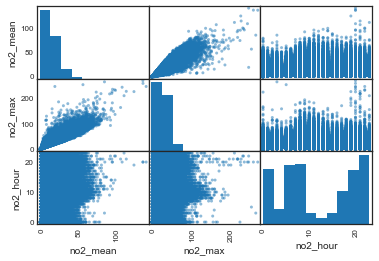

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(nitrogen_dioxide)

          no2_mean   no2_max  no2_hour
no2_mean  1.000000  0.904385  0.112584
no2_max   0.904385  1.000000  0.147929
no2_hour  0.112584  0.147929  1.000000


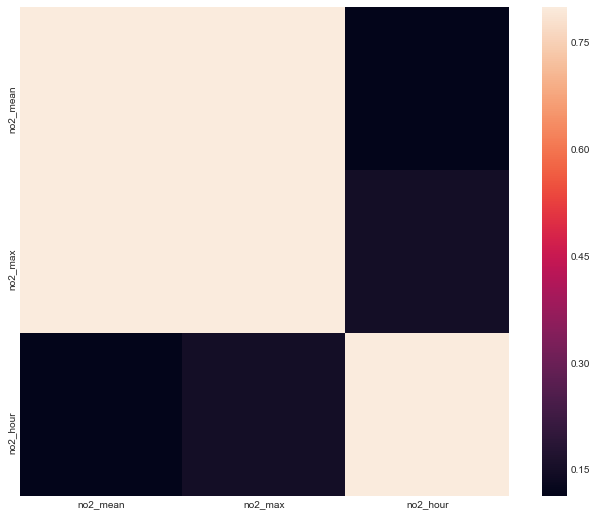

In [11]:
# Make the correlation matrix.
corrmat = nitrogen_dioxide.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

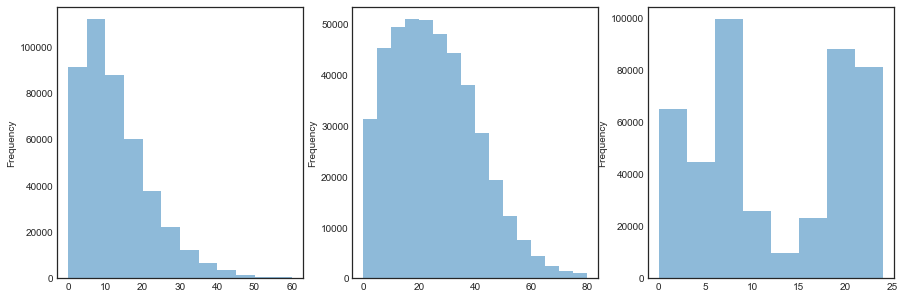

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
no2_data['no2_mean'].plot.hist(alpha=0.5, bins=(0,5,10,15,20,25,30,35,40,45,50,55,60))
plt.subplot(1,3,2)
no2_data['no2_max'].plot.hist(alpha=0.5, bins=(0,5,10,15,20,25,30,35,40,45,50,55,60, 65, 70,75,80))
plt.subplot(1,3,3)
no2_data['no2_hour'].plot.hist(alpha=0.5, bins=(0,3,6,9,12,15,18,21,24))
plt.show()

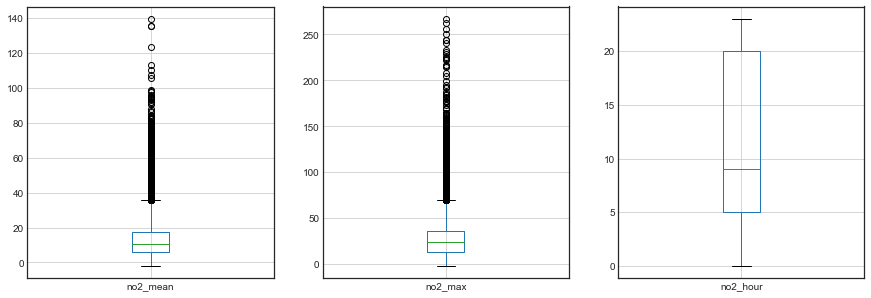

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
no2_data.boxplot('no2_mean')
plt.subplot(1,3,2)
no2_data.boxplot('no2_max')
plt.subplot(1,3,3)
no2_data.boxplot('no2_hour')
plt.show()

### Bivariate

### Feature Engineering

In [15]:
print(no2_data.head())
print(no2_data.state.unique())

    row  state_code  country_code  site_num  \
0     0           4            13      3002   
4     4           4            13      3002   
8     8           4            13      3002   
12   12           4            13      3002   
16   16           4            13      3002   

                                    address    state    county     city  \
0   1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4   1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
8   1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
12  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
16  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

    local_date          no2_units   no2_mean  no2_max  no2_hour  no2_aqi  
0   2000-01-01  Parts per billion  19.041667     49.0        19       46  
4   2000-01-02  Parts per billion  22.958333     36.0        19       34  
8   2000-01-03  Parts per billion  38.125

In [16]:
pacific_sts = ['Washington', 'Oregon', 'California']
west_sts = ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'Utah', 'Nevada']
southwest_sts = ['Texas', 'Oklahoma', 'New Mexico', 'Arizona']
midwest_sts = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Kentucky', 'Ohio', 'West Virginia']
south_sts = ['Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Florida']
northeast_sts = ['Massachusetts', 'New York', 'Pennsylvania', 'Vermont', 'Maine', 'Rhode Island', 'New Jersey', 'New Hampshire', 'Connecticut', 'Delaware', 'Maryland', 'Virginia', 'District Of Columbia']
hawaii_sts = ['Hawaii']
alaska_sts = ['Alaska']

In [18]:
features = pd.get_dummies(no2_data['state'])
features['pacific'] = np.where((no2_data['state'].isin(pacific_sts)), 1, 0)
features['west'] = np.where((no2_data['state'].isin(west_sts)), 1, 0)
features['southwest'] = np.where((no2_data['state'].isin(southwest_sts)), 1, 0)
features['midwest'] = np.where((no2_data['state'].isin(midwest_sts)), 1, 0)
features['south'] = np.where((no2_data['state'].isin(south_sts)), 1, 0)
features['north_east'] = np.where((no2_data['state'].isin(northeast_sts)), 1, 0)
features['hawaii'] = np.where((no2_data['state'].isin(hawaii_sts)), 1, 0)
features['alaska'] = np.where((no2_data['state'].isin(alaska_sts)), 1, 0)

print(pd.crosstab(features['west'], no2_data['state']))

state  Alabama  Alaska  Arizona  Arkansas  California  Colorado  Connecticut  \
west                                                                           
0          782     493    17458      8833      144037         0         7484   
1            0       0        0         0           0      8797            0   

state  Country Of Mexico  Delaware  District Of Columbia   ...     \
west                                                       ...      
0                   2377       908                  6424   ...      
1                      0         0                     0   ...      

state  Rhode Island  South Carolina  South Dakota  Tennessee  Texas  Utah  \
west                                                                        
0              1581            1634          2080       1460  30802     0   
1                 0               0             0          0      0  2167   

state  Virginia  Washington  Wisconsin  Wyoming  
west                                       

In [19]:
no2_data['no2_mean'].describe()

count    436666.000000
mean         12.822330
std           9.505208
min          -2.000000
25%           5.750000
50%          10.739130
75%          17.714286
max         139.541667
Name: no2_mean, dtype: float64

In [20]:
features['high_no2_mean'] = np.where(no2_data['no2_mean']>=17.714286, 1, 0)
print(no2_data['no2_mean'].groupby(features['high_no2_mean']).describe())

                  count       mean       std        min        25%        50%  \
high_no2_mean                                                                   
0              327510.0   8.412523  4.742314  -2.000000   4.541667   8.166667   
1              109156.0  26.053447  7.781015  17.716667  20.333333  23.863636   

                     75%         max  
high_no2_mean                         
0              12.208333   17.714286  
1              29.458333  139.541667  


In [21]:
features['pm_no2_max'] = np.where(no2_data['no2_hour']>=12, 1, 0)
print(no2_data['no2_hour'].groupby(features['pm_no2_max']).describe())

               count       mean       std   min   25%   50%   75%   max
pm_no2_max                                                             
0           234711.0   4.925432  3.162400   0.0   2.0   6.0   7.0  11.0
1           201955.0  19.639702  2.484532  12.0  18.0  20.0  21.0  23.0


In [22]:
features['no2_2000'] = np.where((no2_data['local_date'].str.contains("2000")==True), 1,0)
features['no2_2001'] = np.where((no2_data['local_date'].str.contains("2001")==True), 1,0)
features['no2_2002'] = np.where((no2_data['local_date'].str.contains("2002")==True), 1,0)
features['no2_2003'] = np.where((no2_data['local_date'].str.contains("2003")==True), 1,0)
features['no2_2004'] = np.where((no2_data['local_date'].str.contains("2004")==True), 1,0)
features['no2_2005'] = np.where((no2_data['local_date'].str.contains("2005")==True), 1,0)
features['no2_2006'] = np.where((no2_data['local_date'].str.contains("2006")==True), 1,0)
features['no2_2007'] = np.where((no2_data['local_date'].str.contains("2007")==True), 1,0)
features['no2_2008'] = np.where((no2_data['local_date'].str.contains("2008")==True), 1,0)
features['no2_2009'] = np.where((no2_data['local_date'].str.contains("2009")==True), 1,0)
features['no2_2010'] = np.where((no2_data['local_date'].str.contains("2010")==True), 1,0)
features['no2_2011'] = np.where((no2_data['local_date'].str.contains("2011")==True), 1,0)
features['no2_2012'] = np.where((no2_data['local_date'].str.contains("2012")==True), 1,0)
features['no2_2013'] = np.where((no2_data['local_date'].str.contains("2013")==True), 1,0)
features['no2_2014'] = np.where((no2_data['local_date'].str.contains("2014")==True), 1,0)
features['no2_2015'] = np.where((no2_data['local_date'].str.contains("2015")==True), 1,0)
features['no2_2016'] = np.where((no2_data['local_date'].str.contains("2016")==True), 1,0)

print(pd.crosstab(features['no2_2000'], no2_data['local_date']))

local_date  2000-01-01  2000-01-02  2000-01-03  2000-01-04  2000-01-05  \
no2_2000                                                                 
0                    0           0           0           0           0   
1                   39          38          39          40          40   

local_date  2000-01-06  2000-01-07  2000-01-08  2000-01-09  2000-01-10  \
no2_2000                                                                 
0                    0           0           0           0           0   
1                   41          42          42          42          42   

local_date     ...      2016-05-22  2016-05-23  2016-05-24  2016-05-25  \
no2_2000       ...                                                       
0              ...               7           7           7           7   
1              ...               0           0           0           0   

local_date  2016-05-26  2016-05-27  2016-05-28  2016-05-29  2016-05-30  \
no2_2000                           

In [23]:
features['no2_jan'] = np.where((no2_data['local_date'].str.contains("-01-")==True), 1,0)
features['no2_feb'] = np.where((no2_data['local_date'].str.contains("-02-")==True), 1,0)
features['no2_mar'] = np.where((no2_data['local_date'].str.contains("-03-")==True), 1,0)
features['no2_apr'] = np.where((no2_data['local_date'].str.contains("-04-")==True), 1,0)
features['no2_may'] = np.where((no2_data['local_date'].str.contains("-05-")==True), 1,0)
features['no2_jun'] = np.where((no2_data['local_date'].str.contains("-06-")==True), 1,0)
features['no2_jul'] = np.where((no2_data['local_date'].str.contains("-07-")==True), 1,0)
features['no2_aug'] = np.where((no2_data['local_date'].str.contains("-08-")==True), 1,0)
features['no2_sept'] = np.where((no2_data['local_date'].str.contains("-09-")==True), 1,0)
features['no2_oct'] = np.where((no2_data['local_date'].str.contains("-10-")==True), 1,0)
features['no2_nov'] = np.where((no2_data['local_date'].str.contains("-11-")==True), 1,0)
features['no2_dec'] = np.where((no2_data['local_date'].str.contains("-12-")==True), 1,0)

print(pd.crosstab(features['no2_jan'], no2_data['local_date']))

local_date  2000-01-01  2000-01-02  2000-01-03  2000-01-04  2000-01-05  \
no2_jan                                                                  
0                    0           0           0           0           0   
1                   39          38          39          40          40   

local_date  2000-01-06  2000-01-07  2000-01-08  2000-01-09  2000-01-10  \
no2_jan                                                                  
0                    0           0           0           0           0   
1                   41          42          42          42          42   

local_date     ...      2016-05-22  2016-05-23  2016-05-24  2016-05-25  \
no2_jan        ...                                                       
0              ...               7           7           7           7   
1              ...               0           0           0           0   

local_date  2016-05-26  2016-05-27  2016-05-28  2016-05-29  2016-05-30  \
no2_jan                            

In [24]:
print(no2_data['no2_mean'].groupby(features['no2_jun']).describe())

            count       mean       std       min       25%        50%  \
no2_jun                                                                 
0        397126.0  13.108906  9.657719 -2.000000  5.904348  11.041667   
1         39540.0   9.944053  7.203322 -0.566667  4.766667   8.428869   

               75%         max  
no2_jun                         
0        18.166667  139.541667  
1        13.500000   65.826087  


In [25]:
no2_data[no2_data['local_date'].str.contains("2000")==True]

,row,state_code,country_code,site_num,address,state,county,city,local_date,no2_units,no2_mean,no2_max,no2_hour,no2_aqi
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-03,Parts per billion,38.125000,51.0,8,48
12,12,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-04,Parts per billion,40.260870,74.0,8,72
16,16,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-05,Parts per billion,48.450000,61.0,22,58
20,20,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-06,Parts per billion,39.950000,73.0,8,71
24,24,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-07,Parts per billion,29.625000,43.0,9,41
28,28,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-08,Parts per billion,29.666667,41.0,0,39
32,32,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-09,Parts per billion,25.083333,37.0,20,35
36,36,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-10,Parts per billion,37.666667,70.0,20,68


In [26]:
means = no2_data[['no2_mean', 'no2_max']].mean(axis=0)
stds = no2_data[['no2_mean', 'no2_max']].std(axis=0)
features['no2_mean_max'] = ((no2_data[['no2_mean', 'no2_max']] - means) / stds).mean(axis=1)

plotdf = no2_data.loc[:, ['no2_mean', 'no2_max']]
plotdf['no2_mean_max'] = features['no2_mean_max']
corrmat2 = plotdf.corr()

print(corrmat2)

              no2_mean   no2_max  no2_mean_max
no2_mean      1.000000  0.904385      0.975804
no2_max       0.904385  1.000000      0.975804
no2_mean_max  0.975804  0.975804      1.000000


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

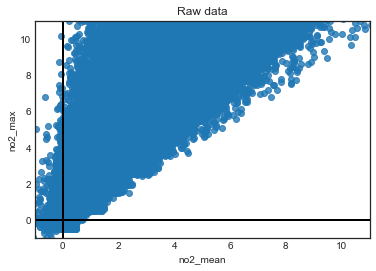

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


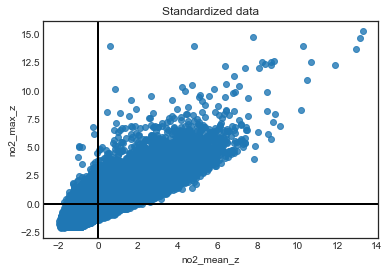

In [28]:
# Make the scatterplot matrix.

# Setting the default plot aesthetics to be prettier.
sns.set_style("white")

# Take a subset of the data for PCA. This limits to Swiss and Czech data from 2012
# and keeps only specific columns.
df_pca = nitrogen_dioxide

t = sns.regplot(
    'no2_mean',
    'no2_max',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
df_pca['no2_mean_z'] = (df_pca['no2_mean'] - df_pca['no2_mean'].mean()) / df_pca['no2_mean'].std()
df_pca['no2_max_z'] = (df_pca['no2_max'] - df_pca['no2_max'].mean()) / df_pca['no2_max'].std()

t = sns.regplot(
    'no2_mean_z',
    'no2_max_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


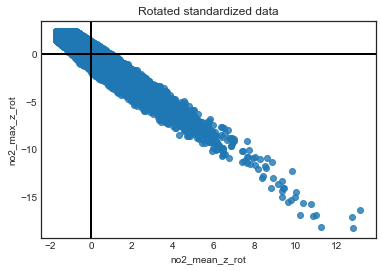

In [31]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['no2_mean_z_rot'] = math.cos(105) * df_pca['no2_mean_z'] - math.sin(105) * df_pca['no2_max_z']
df_pca['no2_max_z_rot'] = math.sin(105) * df_pca['no2_max_z'] + math.cos(105) * df_pca['no2_max_z']

t = sns.regplot(
    'no2_mean_z_rot',
    'no2_max_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [32]:
X = StandardScaler().fit_transform(df_pca)

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000229  0.90438706  0.11258454  1.00000229  0.90438706  0.83830213
  -0.90438706]
 [ 0.90438706  1.00000229  0.14792894  0.90438706  1.00000229  0.99079856
  -1.00000229]
 [ 0.11258454  0.14792894  1.00000229  0.11258454  0.14792894  0.15329246
  -0.14792894]
 [ 1.00000229  0.90438706  0.11258454  1.00000229  0.90438706  0.83830213
  -0.90438706]
 [ 0.90438706  1.00000229  0.14792894  0.90438706  1.00000229  0.99079856
  -1.00000229]
 [ 0.83830213  0.99079856  0.15329246  0.83830213  0.99079856  1.00000229
  -0.99079856]
 [-0.90438706 -1.00000229 -0.14792894 -0.90438706 -1.00000229 -0.99079856
   1.00000229]]


In [34]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 7).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.39633248]
 [ 0.41513533]
 [ 0.07111169]
 [ 0.39633248]
 [ 0.41513533]
 [ 0.40468781]
 [-0.41513533]]
Eigenvalue 1: 5.71805910579518
----------------------------------------
Eigenvector 2: 
[[ 0.0595851 ]
 [ 0.01772669]
 [-0.99596309]
 [ 0.0595851 ]
 [ 0.01772669]
 [ 0.00374774]
 [-0.01772669]]
Eigenvalue 2: 0.9780555967405743
----------------------------------------
Eigenvector 3: 
[[ 0.56885224]
 [-0.21661624]
 [ 0.05477818]
 [ 0.56885224]
 [-0.21661624]
 [-0.45721528]
 [ 0.21661624]]
Eigenvalue 3: 0.30390132805977804
----------------------------------------
Eigenvector 4: 
[[ -1.33259469e-01]
 [  3.10570856e-01]
 [ -6.92899786e-16]
 [ -1.17808503e-01]
 [  3.50423319e-01]
 [ -7.91474417e-01]
 [ -3.50257846e-01]]
Eigenvalue 4: -5.758559263440708e-15
----------------------------------------
Eigenvector 5: 
[[ -3.34831540e-01]
 [  6.81528922e-01]
 [  3.88310649e-17]
 [  3.36152428e-01]
 [ -1.50409746e-01]
 [  4.16400726e-03]
 [  5.36439450e-01]]
Eigenvalue 5: -3.6615

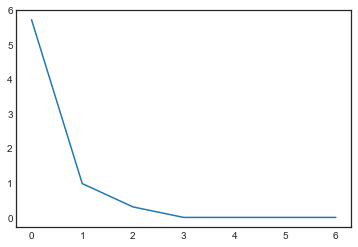

In [35]:
plt.plot(eig_val_cov)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


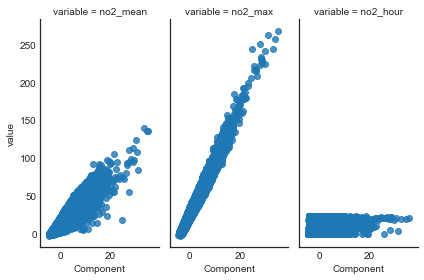

In [37]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['no2_mean', 'no2_max', 'no2_hour']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.81686372  0.13972191  0.04341438]


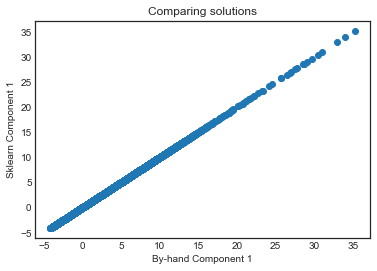

In [38]:
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()